# Soil properties
### Load soil data over Dry Creek EW

Rainey Aberle

GEOS 505

4 October 2022

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# path in directory to data
data_path = '/Users/raineyaberle/Courses/GEOS_505_ResearchComputing/data/geopandas_soil_example/'

# file names
dcew_shp_fn = 'DCEW_BND_GEO.shp'
boi1_soil_shp_fn = 'soilmu_a_id001.shp'
boi2_soil_shp_fn = 'soilmu_a_id683.shp'

In [2]:
# read data files into GeoPandas GeoDataFrames
dcew_bound = gpd.read_file(data_path + 'DCEW_BND/' + dcew_shp_fn)
boi1_soil = gpd.read_file(data_path + 'soilmu_a_id001/' + boi1_soil_shp_fn)
boi2_soil = gpd.read_file(data_path + 'soilmu_a_id683/' +boi2_soil_shp_fn)

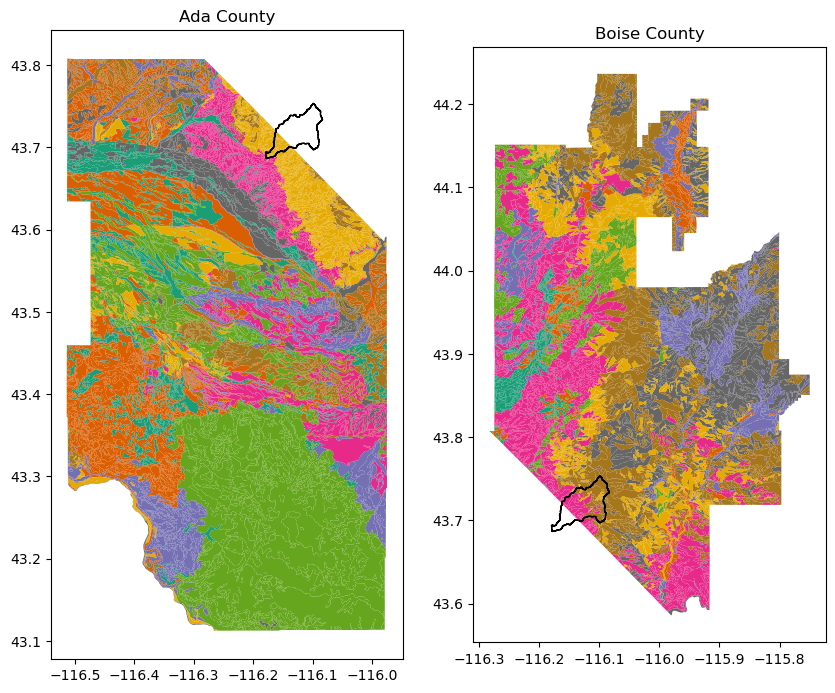

In [3]:
# plot
fig, ax = plt.subplots(1, 2, figsize=(10,10))
boi1_soil.plot(column='MUSYM', cmap='Dark2', ax=ax[0])
dcew_bound.plot(facecolor='none', edgecolor='black', label='DCEW', ax=ax[0])
ax[0].set_title('Ada County')
boi2_soil.plot(column='MUSYM', cmap='Dark2', ax=ax[1])
dcew_bound.plot(facecolor='none', edgecolor='black', label='DCEW', ax=ax[1])
ax[1].set_title('Boise County')
plt.show()

In [4]:
# check CRS of data
print('boi1 =', boi1_soil.crs.to_epsg())
print('boi2 =', boi2_soil.crs.to_epsg()) 
print('dcew_bound:',dcew_bound.crs) 

boi1 = 4326
boi2 = 4326
dcew_bound: epsg:4269


In [5]:
# reproject to same CRS
crs = 4326
boi1_soil_WGS84 = boi1_soil.to_crs(crs)
boi2_soil_WGS84 = boi2_soil.to_crs(crs)
dcew_bound_WGS84 = dcew_bound.to_crs(crs)

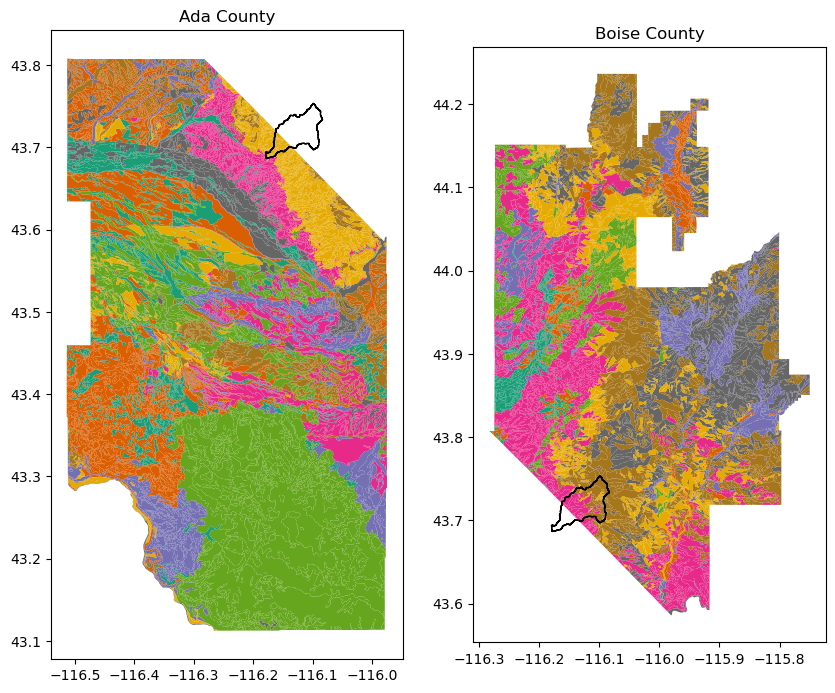

In [6]:
# plot again
fig, ax = plt.subplots(1, 2, figsize=(10,10))
boi1_soil_WGS84.plot(column='MUSYM', cmap='Dark2', ax=ax[0])
dcew_bound_WGS84.plot(facecolor='none', edgecolor='black', label='DCEW', ax=ax[0])
ax[0].set_title('Ada County')
boi2_soil_WGS84.plot(column='MUSYM', cmap='Dark2', ax=ax[1])
dcew_bound_WGS84.plot(facecolor='none', edgecolor='black', label='DCEW', ax=ax[1])
ax[1].set_title('Boise County')
plt.show()

In [7]:
# combine soil datasets
boise_front_soils = gpd.pd.concat([boi1_soil_WGS84, boi2_soil_WGS84])
boise_front_soils

,AREASYMBOL,SPATIALVER,MUSYM,MUKEY,geometry
0,ID001,3,35,2496659,"POLYGON ((-116.29208 43.42162, -116.29208 43.4..."
1,ID001,3,13,2496640,"POLYGON ((-116.14104 43.42058, -116.14099 43.4..."
2,ID001,3,143,2519100,"POLYGON ((-116.28288 43.39489, -116.28292 43.3..."
3,ID001,3,11,2496639,"POLYGON ((-116.18151 43.52654, -116.18141 43.5..."
4,ID001,3,11,2496639,"POLYGON ((-116.16060 43.52103, -116.16029 43.5..."
...,...,...,...,...,...
5135,ID683,3,712,2519768,"POLYGON ((-115.94437 44.09202, -115.94468 44.0..."
5136,ID683,3,712,2519768,"POLYGON ((-115.94327 44.08998, -115.94432 44.0..."
5137,ID683,3,529,2519656,"POLYGON ((-115.95451 43.78111, -115.95477 43.7..."
5138,ID683,3,734,2519794,"POLYGON ((-115.99899 43.90523, -115.99883 43.9..."


In [8]:
# clip soils to DCEW bounds
dcew_soils = gpd.clip(boise_front_soils, dcew_bound_WGS84)
dcew_soils

,AREASYMBOL,SPATIALVER,MUSYM,MUKEY,geometry
988,ID683,3,711,2519711,"MULTIPOLYGON (((-116.09924 43.69756, -116.0990..."
4556,ID683,3,721,2519700,"POLYGON ((-116.09677 43.69777, -116.09681 43.6..."
1406,ID683,3,711,2519711,"POLYGON ((-116.09157 43.70108, -116.09151 43.7..."
142,ID683,3,715,2519824,"MULTIPOLYGON (((-116.10533 43.70318, -116.1053..."
2011,ID683,3,718,2519726,"MULTIPOLYGON (((-116.12040 43.70413, -116.1204..."
...,...,...,...,...,...
2786,ID001,3,3060,2519196,"POLYGON ((-116.17871 43.69352, -116.17866 43.6..."
922,ID001,3,5025,2519245,"MULTIPOLYGON (((-116.15497 43.69804, -116.1542..."
313,ID683,3,525,2519792,"POLYGON ((-116.13127 43.69885, -116.13121 43.6..."
3590,ID001,3,5026,2519246,"POLYGON ((-116.15100 43.69601, -116.15083 43.6..."


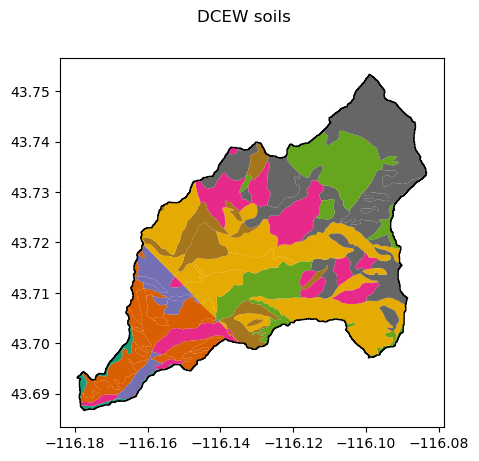

In [9]:
# plot results
fig, ax = plt.subplots()
dcew_soils.plot(ax=ax, column='MUKEY', cmap='Dark2')
dcew_bound_WGS84.plot(ax=ax, edgecolor='black', facecolor='none')
fig.suptitle('DCEW soils')
plt.show()

In [10]:
# save output
dcew_soils.to_file(data_path + 'dcew_soil-2022-10-04.kmz')

/Users/raineyaberle/opt/anaconda3/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
